In [ ]:
# Importing libraries

import pandas as pd 
import numpy as np
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats as st

from dotenv import load_dotenv
import os
#pip install pandas mysql-connector-python
#pip install python-dotenv

### Importing data

In [38]:
load_dotenv() 

conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    passwd = os.getenv('MYSQL_PASSWORD'),
    database = 'e_master_card'
    
)

In [ ]:
df_cust = pd.read_sql('select * from customers', conn)
df_trans= pd.read_sql('select * from transactions', conn)
df_credit = pd.read_sql('select * from credit_profiles', conn)

C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\2980546640.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans= pd.read_sql('select * from transactions', conn)


### Customer Table Analysis

In [211]:
df_cust.describe()
# findings:
#annual income cannot be 0
# age cannot be 135

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


### Observations:
* Outliers present in data 
* For ex: age= 1, 135 not possible

In [41]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [43]:
df_cust['annual_income'].value_counts().sort_index(ascending=True)

annual_income
0         50
2          3
20         1
50         6
5175       1
          ..
447655     1
448071     1
448510     1
448699     1
449346     1
Name: count, Length: 944, dtype: int64

* No null values in annual income 
* But income cannot be 0, 2,20 replacing annual income of <=50 with median

In [55]:
df_cust[df_cust['annual_income'] <= 50]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
31,32,Veer Mistry,Male,50,City,Business Owner,50,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,0,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,0,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,0,Married
170,171,Advait Verma,Male,52,City,Business Owner,0,Single
186,187,Samar Sardar,Male,53,City,Consultant,0,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,0,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,0,Married


### Replacing income according to occupation median

In [233]:
median_incomes = df_cust.groupby(['occupation'],as_index=False)['annual_income'].median().rename( \
  columns= {'annual_income':'median_income'}
)

df_cust = df_cust.merge(median_incomes,on='occupation',how='left')

df_cust['annual_income'] = df_cust.apply(lambda x: x['median_income'] \
  if x['annual_income'] <= 50 else x['annual_income'],axis=1)

df_cust = df_cust.drop(columns='median_income')


<Axes: xlabel='annual_income', ylabel='Count'>

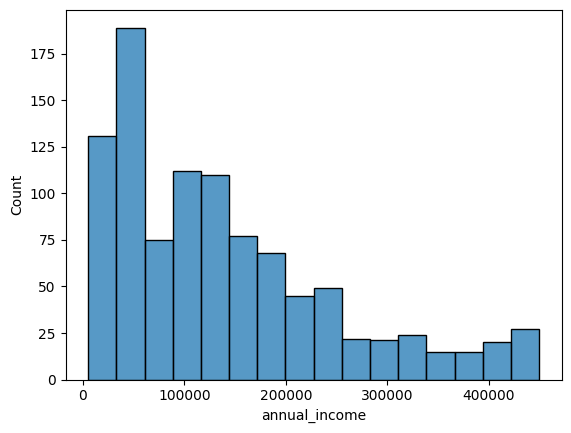

In [66]:
sns.histplot(df_cust['annual_income'])

<Axes: ylabel='annual_income'>

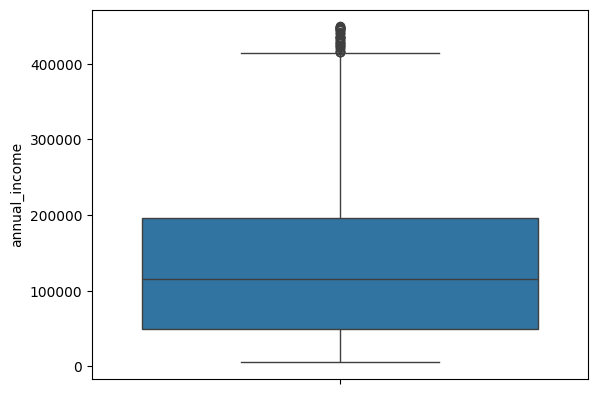

In [70]:
sns.boxplot(df_cust['annual_income'])

### Category wise annual income

C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\2079269613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_incomes, x=col, y='annual_income', palette='tab10', ax=axes[idx])
C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\2079269613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_incomes, x=col, y='annual_income', palette='tab10', ax=axes[idx])
C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\2079269613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_incomes, x=col, y='annual

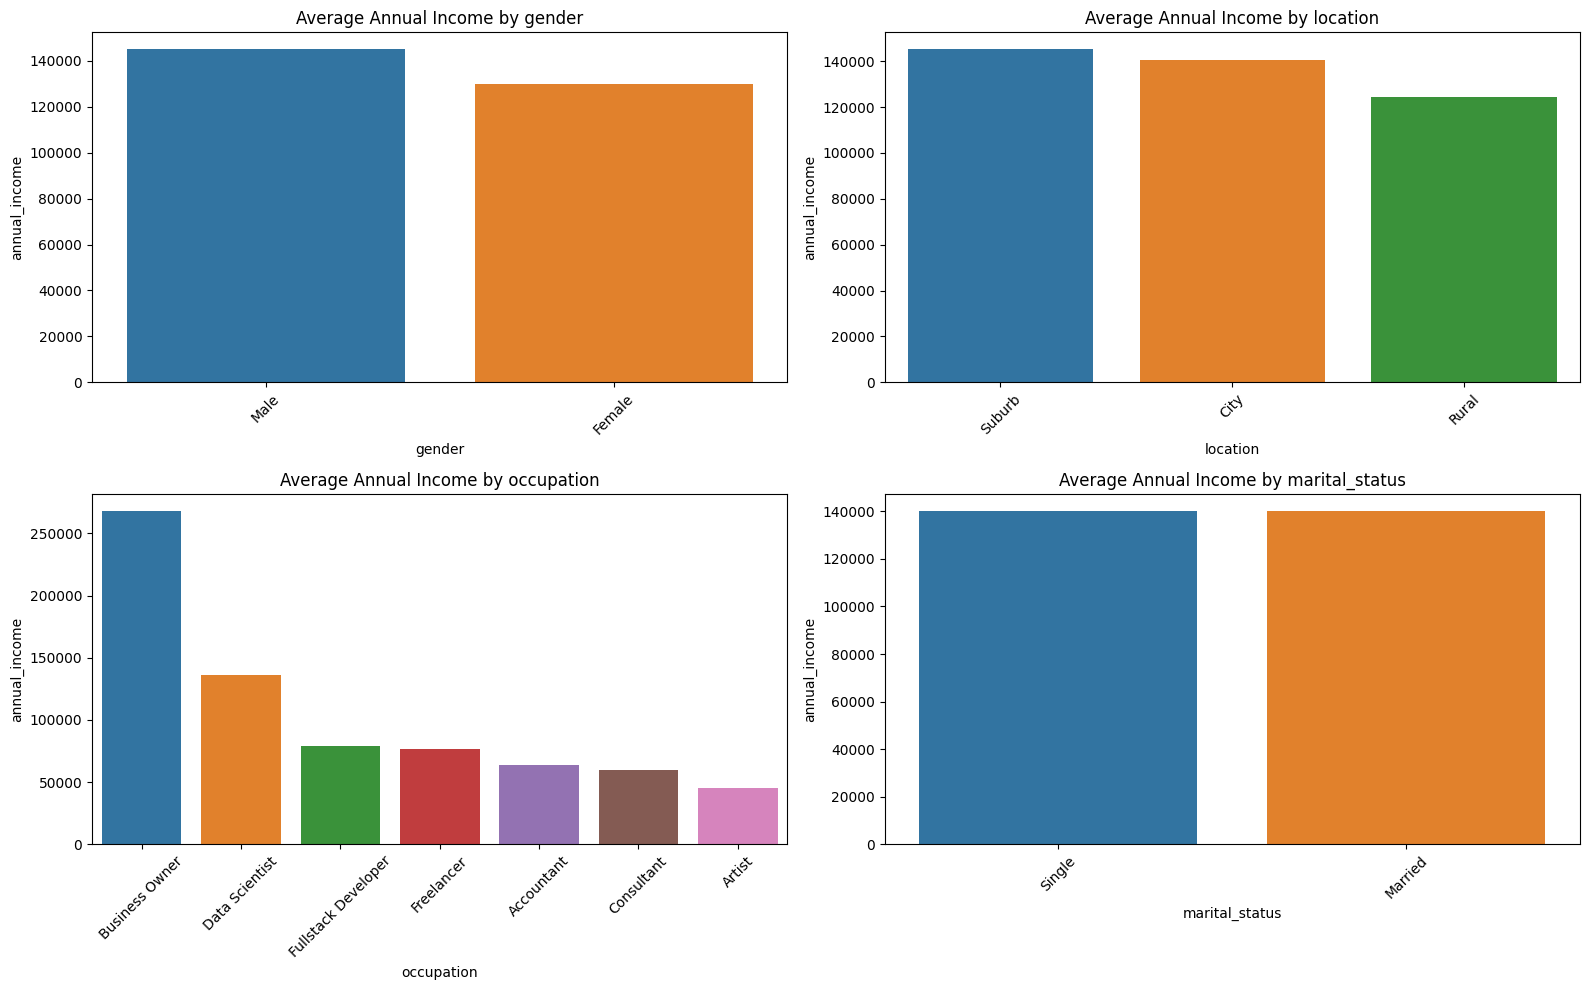

In [84]:
cat_cols = ['gender','location','occupation','marital_status']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # flatten 2D array of axes into 1D for easy indexing

for idx, col in enumerate(cat_cols):
    mean_incomes = df_cust.groupby(col, as_index=False)['annual_income'].mean()
    mean_incomes = mean_incomes.sort_values('annual_income', ascending=False)

    sns.barplot(data=mean_incomes, x=col, y='annual_income', palette='tab10', ax=axes[idx])
    axes[idx].set_title(f'Average Annual Income by {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

* We can see annual income of business owners is high, followed by Data Scientists

### Outlier treatment of age
* only keeping age between 15 and 80

In [234]:
df_cust = df_cust[(df_cust['age'] >= 15) & (df_cust['age'] <=80)]

In [235]:
median_age = df_cust.groupby(['occupation'],as_index=False)['age'].median().rename( \
  columns= {'age':'median_age'}
)

df_cust = df_cust.merge(median_age,on='occupation',how='left')

df_cust['age'] = df_cust.apply(lambda x: x['median_age'] \
  if (x['age'] < 15) | (x['age'] > 80) else x['age'],axis=1)

df_cust = df_cust.drop(columns='median_age')

<Axes: xlabel='age', ylabel='Count'>

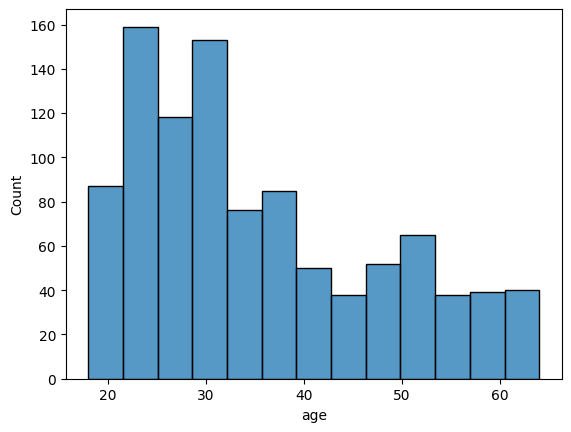

In [114]:
sns.histplot(df_cust['age'])

### Visualization

In [236]:
df_cust['age_group'] = df_cust.apply(lambda x: '18-25' if (x['age'] >18) & (x['age'] <=25) \
                                     else '26-48' if (x['age'] > 25) & (x['age'] <=48) \
                                     else '49-65',axis=1 \
                                     )

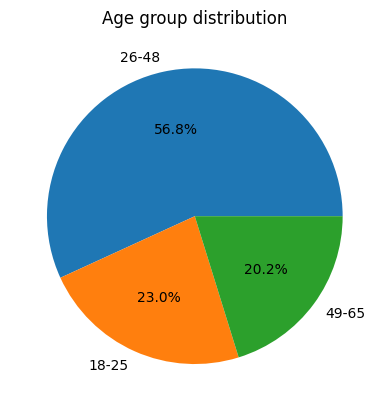

In [237]:
plt.pie(df_cust['age_group'].value_counts(),
        labels=df_cust['age_group'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Age group distribution')
plt.show()

### We can see age group 26-48 spend most 

### Location wise gender distribution

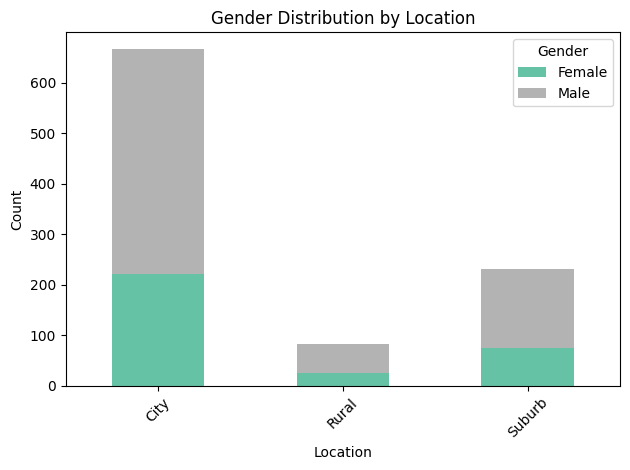

In [238]:
grouped = df_cust.groupby(['location','gender']).size().unstack()
grouped.plot(kind='bar', stacked=True, colormap='Set2')

plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### Credit score table

In [239]:
df_credit[df_credit['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [ ]:
# Dropping some duplicates
df_credit = df_credit.drop_duplicates(subset='cust_id',keep='last')

In [242]:
df_credit.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [173]:
df_credit[pd.isna(df_credit['credit_limit'])]
# using credit limit to fill nan values for creditlimit,
# bcz as credit score increase credit limit increase

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


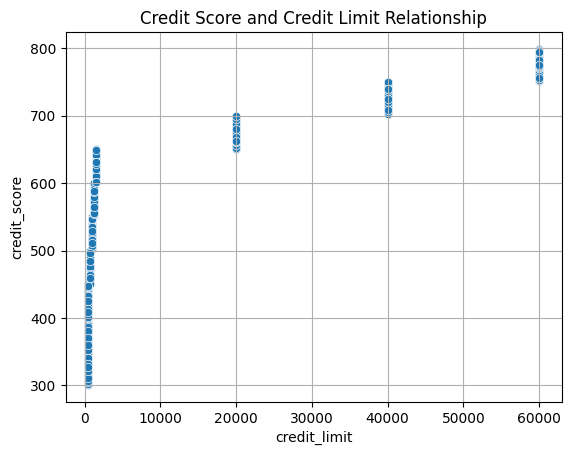

In [176]:
sns.scatterplot(data= df_credit, x='credit_limit',y='credit_score')
plt.title("Credit Score and Credit Limit Relationship")
plt.grid(True)
plt.show()

In [183]:
df_credit['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

In [194]:
df_credit[(df_credit['credit_limit'] >= 60000)
          ]['credit_score'].max()

np.int64(799)

### Creating credit score range bins
* Created credit score bins to impute nan values with correct credit limit 

In [243]:
bin = [0,650,699,750,1000]
bin_labels = ['0-649','650-698','699-749','750-1000']
df_credit['credit_score_range'] = pd.cut(df_credit['credit_score'],bins=bin, labels = bin_labels, include_lowest=True)

In [244]:
median_credit_limit = df_credit.groupby(['credit_score_range'],as_index=False)['credit_limit'].median().rename( \
  columns= {'credit_limit':'median_credit_limit'}
)

df_credit = df_credit.merge(median_credit_limit,on='credit_score_range',how='left')

df_credit['credit_limit'] = df_credit.apply(lambda x: x['median_credit_limit'] \
  if pd.isna(x['credit_limit']) else x['credit_limit'],axis=1)

df_credit = df_credit.drop(columns='median_credit_limit')

C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\2812713241.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_credit_limit = df_credit.groupby(['credit_score_range'],as_index=False)['credit_limit'].median().rename( \


* Obervation: Outstanding_debt cannot be more than credit limit

<Axes: ylabel='outstanding_debt'>

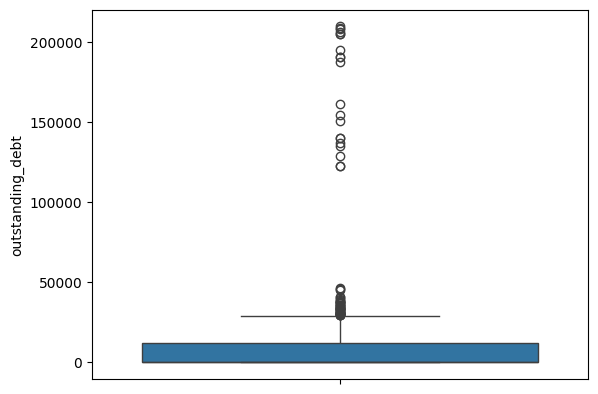

In [250]:
sns.boxplot(df_credit['outstanding_debt'])

* Outlier treatment in outstanding dept, replacing with credit limit

In [256]:
df_credit['outstanding_debt'] = df_credit.apply(lambda x: x['credit_limit'] if \
    
    x['outstanding_debt'] > x['credit_limit'] else x['outstanding_debt'],axis=1)

In [276]:
df_credit_cust = df_credit.merge(df_cust, on= 'cust_id',how='inner')

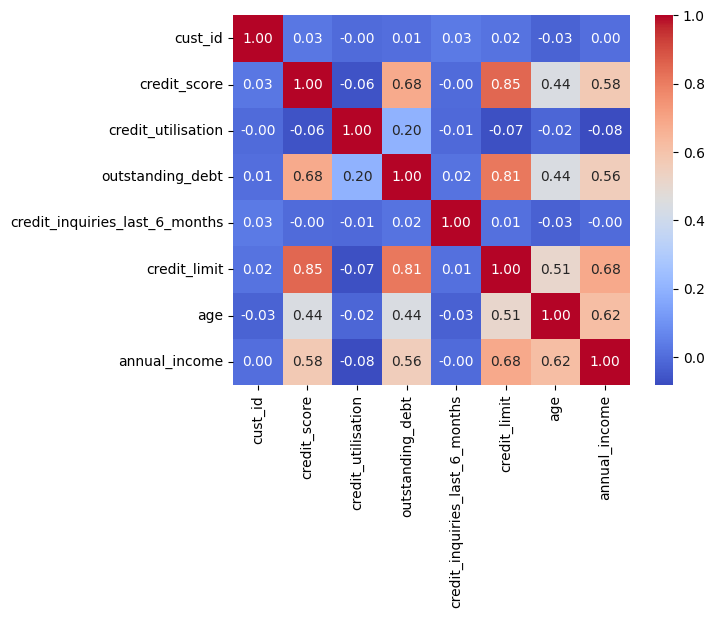

In [281]:
numeric_cols = df_credit_cust.select_dtypes(include='number').columns
sns.heatmap(df_credit_cust[numeric_cols].corr(
),annot=True,fmt='.2f',cmap='coolwarm')

plt.show()

### Transaction Table

* Replacing Nan with mode in platform

In [ ]:
df_trans['platform'] = df_trans['platform'].fillna(df_trans['platform'].mode()[0])

0         Flipkart
1          Alibaba
2          Shopify
3          Shopify
4           Amazon
            ...   
499995      Amazon
499996      Meesho
499997      Amazon
499998    Flipkart
499999      Amazon
Name: platform, Length: 500000, dtype: object

* Replacing nan values in amount according to groups: platform, product_category etc.

In [381]:
zero_median = df_trans[(df_trans['platform'] == 'Amazon') & \
(df_trans['product_category'] == 'Electronics') &\
    (df_trans['payment_type'] == 'Credit Card') & \
        (df_trans['tran_amount'] > 0 )
        ].groupby(['platform','product_category','payment_type'])\
        ['tran_amount'].median().reset_index().rename(columns= {'tran_amount':'median_amount'})

In [390]:
df_trans = df_trans.merge(zero_median,on=['platform','product_category','payment_type'],how='left')

df_trans['tran_amount'] = df_trans.apply(lambda x: x['median_amount'] \
  if (x['product_category'] == 'Electronics') &\
    (x['payment_type'] == 'Credit Card') & \
      (x['platform'] == 'Amazon') & \
        (x['tran_amount'] == 0 )  else x['tran_amount'],axis=1)

df_trans = df_trans.drop(columns='median_amount')

<Axes: ylabel='tran_amount'>

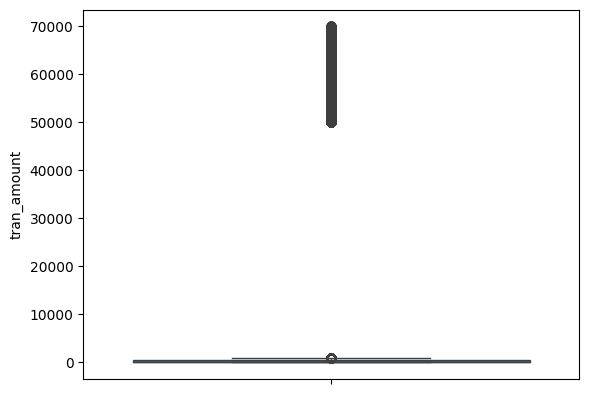

In [393]:
sns.boxplot(df_trans['tran_amount'])

### Outliers in Transaction Table using IQR

In [394]:
q1,q3 = df_trans['tran_amount'].quantile([0.25,0.75])
iqr = q3-q1
lower = q1 - 2*iqr
upper = q3 + 2*iqr

In [395]:
cat_level_median = df_trans[df_trans['tran_amount'] <= upper].groupby(['product_category'])['tran_amount'].median().reset_index().rename(columns = {'tran_amount' : 'cat_level_median'})

df_trans = df_trans.merge(cat_level_median,on=['product_category'],how='left')

df_trans['tran_amount'] = df_trans.apply(lambda x: x['cat_level_median'] \
  if x['tran_amount'] > upper else x['tran_amount'],axis=1)

df_trans = df_trans.drop(columns='cat_level_median')

<Axes: xlabel='tran_amount', ylabel='Count'>

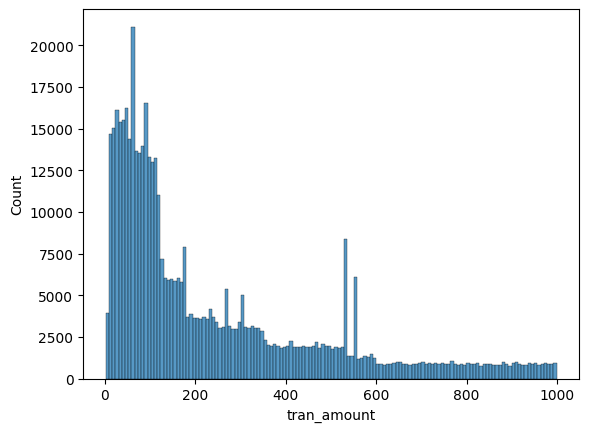

In [398]:
sns.histplot(df_trans['tran_amount'])

In [404]:
df_trans.shape

(500000, 7)

In [401]:
df_trans['payment_type'].value_counts()/len(df_trans['payment_type']) * 100

payment_type
Phonepe        28.8456
Credit Card    27.9556
Gpay           21.8436
Debit Card     11.9000
Net Banking     8.6446
Cash            0.8106
Name: count, dtype: float64

In [ ]:
cust_trans = df_cust.merge(df_trans, on ='cust_id', how = 'inner')
payment_type_grouped_cust_trans = cust_trans.groupby(['age_group','payment_type']).size().reset_index(name='count')

payment_type_grouped_cust_trans = payment_type_grouped_cust_trans.pivot(index='age_group', columns='payment_type', values='count')
payment_type_grouped_cust_trans.plot(kind='bar',  colormap='Set2')
plt.title('Age Group wise payment method')
plt.show()

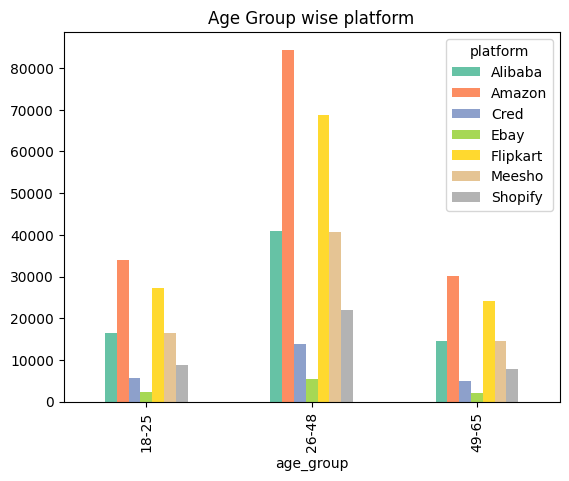

In [433]:
platform_grouped_cust_trans = cust_trans.groupby(['age_group','platform']).size().reset_index(name='count')
platform_grouped_cust_trans = platform_grouped_cust_trans.pivot(index='age_group', columns='platform', values='count')
platform_grouped_cust_trans.plot(kind='bar',  colormap='Set2')
plt.title('Age Group wise platform')
plt.show()

In [436]:
product_category_grouped_cust_trans = cust_trans.groupby(['age_group','product_category']).size().reset_index(name='count')
product_category_grouped_cust_trans = product_category_grouped_cust_trans.pivot(index='age_group', columns='product_category', values='count')


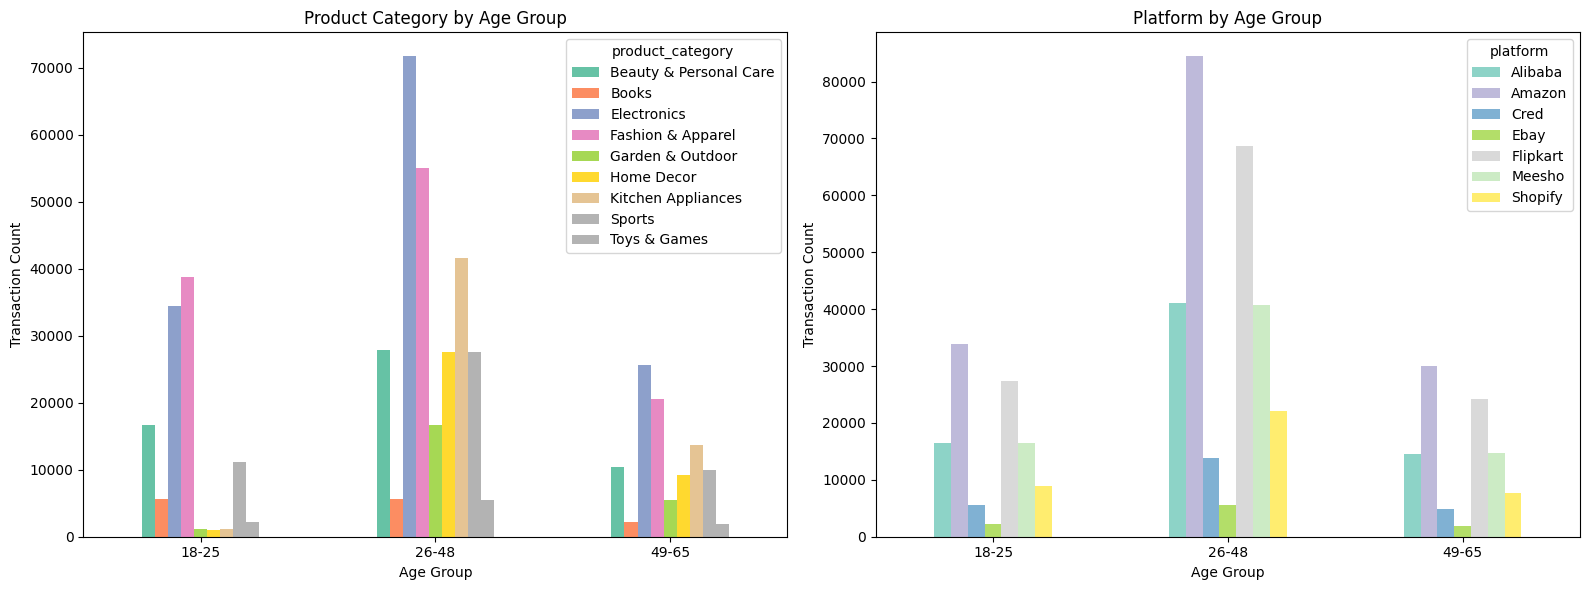

In [437]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot payment_type on first subplot
product_category_grouped_cust_trans.plot(kind='bar', colormap='Set2', ax=axes[0])
axes[0].set_title('Product Category by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Transaction Count')
axes[0].tick_params(axis='x', rotation=0)

# Plot platform on second subplot
platform_grouped_cust_trans.plot(kind='bar', colormap='Set3', ax=axes[1])
axes[1].set_title('Platform by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Transaction Count')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Important Observation:
* 26-48 and 49-65 age group are already using credit card, so it wont make any sense to
* target those group for credit card, so we have made decision to target 18-25 group for 
* campaign

C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\1672318693.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_tran_amount, x=col, y='tran_amount', palette='tab10', ax=axes[idx])
C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\1672318693.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_tran_amount, x=col, y='tran_amount', palette='tab10', ax=axes[idx])
C:\Users\gaurav malik\AppData\Local\Temp\ipykernel_17028\1672318693.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_tran_amount, x=col

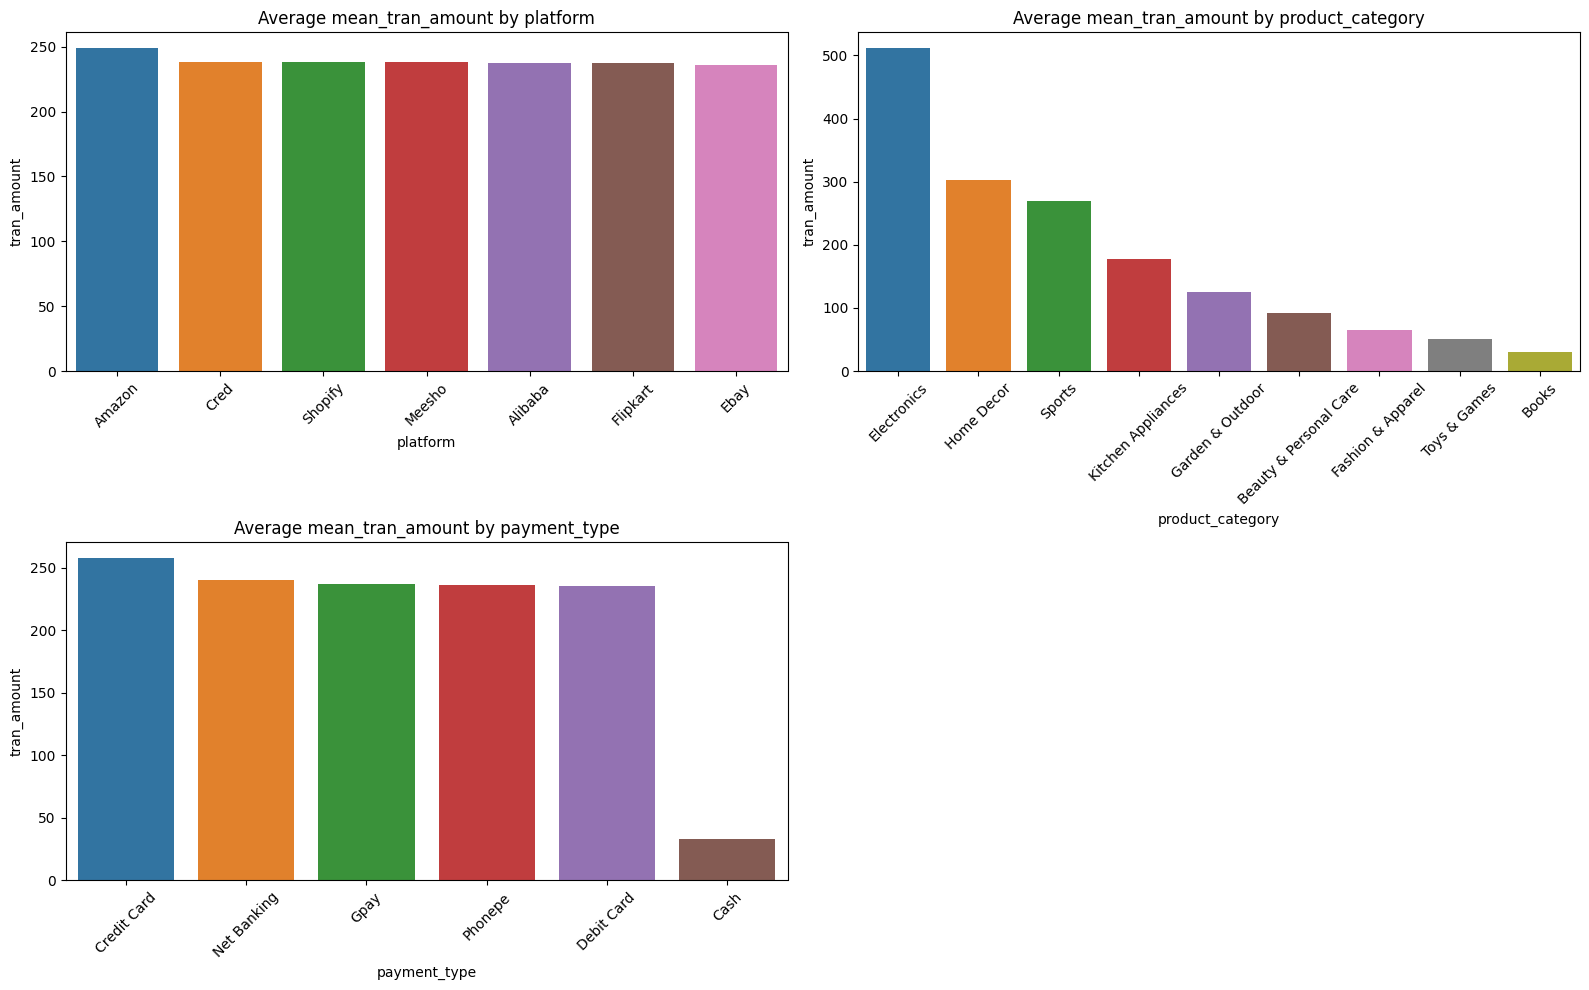

In [450]:
cat_cols = ['platform'	,'product_category',	'payment_type']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))  # 2x2 grid for 4 plots
axes = axes.flatten()  # flatten 2D array of axes into 1D for easy indexing

for idx, col in enumerate(cat_cols):
    mean_tran_amount = cust_trans.groupby(col, as_index=False)['tran_amount'].mean()
    mean_tran_amount = mean_tran_amount.sort_values('tran_amount', ascending=False)

    sns.barplot(data=mean_tran_amount, x=col, y='tran_amount', palette='tab10', ax=axes[idx])
    axes[idx].set_title(f'Average mean_tran_amount by {col}')
    axes[idx].tick_params(axis='x', rotation=45)
axes[3].axis('off')

plt.tight_layout()
plt.show()

## AB Testing
* Null Hypothesis: The new credit card does not increase the average number of transactions.
* Alternate Hypothesis: The new credit card increases the average number of transactions.

In [73]:
alpha = 0.05 # 5% significance
power = 0.8 # Strong
effect_size= 0.4  # mean1 - mean 2 /SD

sms.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power = power,
    ratio =1 
)

99.08032514658997

In [37]:
## Out of 100 test group, after 2 months, 40 people got converted to new credit card, than you form control group of 40 people 

In [65]:
df_after_campaign = pd.read_csv("C:/Users/gaurav malik/Codebasics DS Projects/Stats/chapter8_assets/chapter8_assets/datasets/avg_transactions_after_campaign.csv")

In [66]:
control_mean = df_after_campaign['control_group_avg_tran'].mean()
control_var = df_after_campaign['control_group_avg_tran'].var(ddof=0)

test_mean = df_after_campaign['test_group_avg_tran'].mean()
test_var = df_after_campaign['test_group_avg_tran'].var(ddof=0)

In [69]:
z_score = (test_mean - control_mean) / np.sqrt((control_var/len(df_after_campaign) + test_var/len(df_after_campaign)))
z_score

np.float64(2.770732827433086)

In [75]:
p_value = (1 - st.norm.cdf(z_score)) # get p value from z score
p_value

np.float64(0.0027965149024101743)

In [76]:
p_value > alpha

np.False_

## Conclusion
* Since the p-value is less than the significance level (α), we reject the null hypothesis. This suggests that the new credit card leads to a statistically significant increase in average transactions.
Therefore, we recommend releasing the new credit card.